In [18]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import (start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events,
    plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial, create_full_metadata)

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
from  plot_general import rose_plot, plot_eye_movements
from unfoldpy.unfoldpy import Unfolder, create_design_matrix, _times_to_samples
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample


#%matplotlib qt

In [7]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
n_bootstraps = 10
tmin=-0.2 
tmax=0.3

#----------parameters-------------
for subj in [0]:
    eeg = load.subject(info,subj).load_analysis_eeg()
    eeg = load.subject(info,subj).load_electrode_positions(eeg)
    evts = load.subject(info,subj).load_metadata()
    ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
    sample_size = ev_fix.shape[0]
    sr =  eeg.info['sfreq']
    # create a matrix to store the bootstrap estimates of the coefficients
    boot_coef = np.empty([n_bootstraps, int(sr*(tmax-tmin)+1)])

    # perform the bootstrap
    for i in range(n_bootstraps):
        # randomly sample the indices of the observations with replacement
        indices = resample(range(sample_size), replace=True)
        # select the corresponding rows of the sparse matrix X and the target vector y
        X_sample = ev_fix.iloc[indices]

        event = [ (int(record[1]),0,1) for record in  X_sample.to_records(index=False) if 600>record[3]>100]
        epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',
                            preload=True)       

        print(f'the botstrap sample data {i} was fitted')
        # store the estimates of the coefficients
        
        

    # calculate the bootstrap mean and standard error for each coefficient
    #boot_mean = [sum([coef[i] for coef in boot_coef])/n_bootstraps for i in range(X.shape[1])]
    #boot_std_error = [((sum([(coef[i] - boot_mean[i])**2 for coef in boot_coef])/(n_bootstraps-1))/n_bootstraps)**0.5 for i in range(X.shape[1])]


Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

Reading /Volumes/DAC500/Hybrid/Hybrid_preana_out/8.data_analysis/S101_analysis.fdt
Reading 0 ... 1769499  =      0.000 ...  3538.998 secs...


/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['R-AREA', 'R-GAZE-X', 'R-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)



Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ５００/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ａｎａ_ｏｕｔ/ｍｅｔａｄａｔａ/Ｓ１０１_ｆｕｌｌ_ｍｅｔａｄａｔａ．ｃｓｖ

Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
948 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 948 events and 251 original time points ...


/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


2 bad epochs dropped
the botstrap sample data 0 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
968 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 968 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


2 bad epochs dropped
the botstrap sample data 1 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
932 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 932 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


0 bad epochs dropped
the botstrap sample data 2 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
933 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 933 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


2 bad epochs dropped
the botstrap sample data 3 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
925 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 925 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


1 bad epochs dropped
the botstrap sample data 4 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
946 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 946 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


2 bad epochs dropped
the botstrap sample data 5 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
924 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 924 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


1 bad epochs dropped
the botstrap sample data 6 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
933 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 933 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


1 bad epochs dropped
the botstrap sample data 7 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
924 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 924 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


1 bad epochs dropped
the botstrap sample data 8 was fitted
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
923 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 923 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_51652/905175203.py:28: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,event_repeated='merge',


1 bad epochs dropped
the botstrap sample data 9 was fitted


NameError: name 'X' is not defined

In [33]:
sample_size = ev_fix.shape[0]
indices = resample(range(sample_size), replace=True)
ev_fix.iloc[indices]

,type,latency,urevent,duration,endtime,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,...,fix_avgpupilsize,sac_angle,trial,phase,mss,ontarget,ondistractor,present,correct,stm
13539,fixation,1388800.0,27585.0,133,0.0,4.688193,1212.688477,573.462830,958.637817,533.862183,...,0.0,8.803231,181.0,vs,4.0,False,True,True,True,cat2004.png
6862,fixation,747130.0,24656.0,120,0.0,5.338123,385.321350,128.955338,673.400024,177.655655,...,0.0,-170.375408,97.0,vs,4.0,False,True,False,True,teddy bear1491.png
15157,fixation,1513963.0,28310.0,88,0.0,3.983773,459.039825,377.579651,585.680359,199.539230,...,0.0,125.691081,201.0,vs,4.0,False,True,True,True,person52.png
7847,fixation,820832.0,25087.0,53,0.0,6.491831,682.194519,935.330139,1035.041016,894.741028,...,0.0,173.395909,111.0,vs,2.0,False,True,True,True,stm_building_003_person_001_005.png
11449,fixation,1192437.0,26662.0,79,0.0,4.409770,831.118958,236.961700,1062.294678,299.521362,...,0.0,-165.203070,156.0,vs,2.0,False,True,False,True,dog415.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,fixation,1009342.0,25885.0,114,0.0,6.521272,434.170197,916.261719,788.700012,877.288391,...,0.0,173.684935,133.0,vs,2.0,False,True,False,True,kite597.png
3638,fixation,395305.0,23264.0,152,0.0,3.680125,1171.333130,614.721985,981.867737,546.944092,...,0.0,19.512075,53.0,vs,2.0,False,True,False,True,truck183.png
9664,fixation,1008913.0,25881.0,85,0.0,6.235821,576.755310,754.200012,677.648865,429.151123,...,0.0,107.429287,133.0,vs,2.0,False,True,False,True,kite615.png
4911,fixation,557035.0,23809.0,85,0.0,1.313505,751.099976,309.168945,805.053955,262.915344,...,0.0,139.692846,71.0,vs,4.0,False,True,True,True,backpack366.png


In [36]:
boot_coef

array([[ 4.65448265e-310,  4.65448414e-310,  4.65448265e-310, ...,
         6.90738837e-310,  4.65447909e-310,  4.65447909e-310],
       [ 4.65447909e-310,  4.65447909e-310,  6.90738837e-310, ...,
         4.65447909e-310,  4.65447909e-310,  4.65447909e-310],
       [ 4.65447909e-310,  4.65447909e-310,  4.65447909e-310, ...,
         4.65447909e-310,  4.65447909e-310,  4.65447909e-310],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         6.90739304e-310,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         6.90739307e-310,  6.90736922e-310, -3.75143436e-084],
       [ 6.90739206e-310,  6.90736904e-310, -1.46503189e-227, ...,
         0.00000000e+000,              nan,              nan]])

In [32]:
ev_fix

,type,latency,urevent,duration,endtime,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,...,fix_avgpupilsize,sac_angle,trial,phase,mss,ontarget,ondistractor,present,correct,stm
11,fixation,77252.0,21696.0,177,0.0,0.987058,979.210632,489.299988,937.953613,525.895203,...,0.0,-41.819136,1.0,vs,2.0,False,True,False,True,car14.png
17,fixation,77705.0,21699.0,73,0.0,10.177722,776.767334,348.455444,1321.844971,241.420334,...,0.0,168.991694,1.0,vs,2.0,False,True,False,True,truck36.png
53,fixation,80121.0,21717.0,135,0.0,19.271341,1227.674194,332.258026,418.153809,1002.476868,...,0.0,-39.648056,1.0,vs,2.0,False,True,False,True,car153.png
55,fixation,80275.0,21718.0,83,0.0,1.547204,1142.951782,367.678833,1224.699951,349.378632,...,0.0,167.604755,1.0,vs,2.0,False,True,False,True,car153.png
88,fixation,83494.0,21731.0,121,0.0,1.082030,953.359497,599.102722,955.107971,539.271973,...,0.0,91.222019,2.0,vs,1.0,False,True,True,True,cat1707.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15841,fixation,1562793.0,28618.0,83,0.0,1.702557,572.584473,238.102890,564.644287,332.172150,...,0.0,-85.131696,209.0,vs,4.0,False,True,False,False,dog1139.png
15843,fixation,1562924.0,28619.0,81,0.0,13.702229,532.400024,979.891602,571.753784,232.853775,...,0.0,93.089815,209.0,vs,4.0,False,True,False,False,dog97.png
15845,fixation,1563014.0,28620.0,151,0.0,0.659814,505.801727,998.928711,531.038025,969.260010,...,0.0,131.041561,209.0,vs,4.0,False,True,False,False,dog97.png
15847,fixation,1563221.0,28621.0,75,0.0,6.076535,503.743774,669.352295,513.574524,1000.934937,...,0.0,-92.031594,209.0,vs,4.0,False,True,False,False,dog52.png


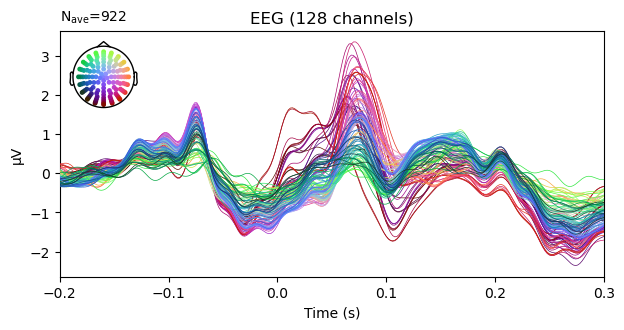

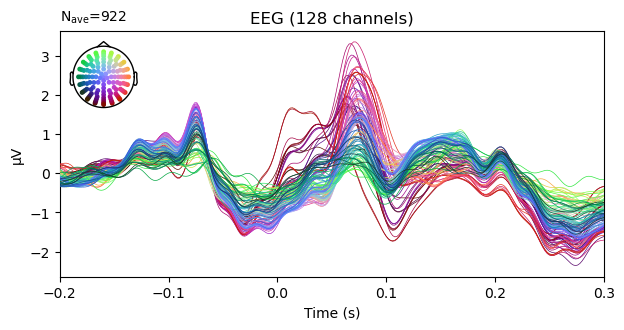

In [27]:
import numpy as np
import mne



data = np.random.randn(128, 300)  # 32 channels, 100 time points

# Assuming you have your data stored in a NumPy array called 'data'
# with shape (n_channels, n_times)
n_channels, n_times = data.shape

# Create an info structure for your data
sfreq = 1000  # Assuming a sampling frequency of 1000 Hz
ch_names = eeg.info.ch_names[:128]  # Replace with actual channel names
ch_types = ['eeg'] * n_channels  # Assuming all channels are EEG
info = mne.create_info(ch_names, sfreq, ch_types)

# Create an Evoked object from your data and info
evoked = mne.EvokedArray(data, info)
evoked = epochs.average(picks=range(128))

# Load the Montage128 BioSemi
montage = mne.channels.make_standard_montage('biosemi128')
evoked.set_montage(montage)

# Plot the evoked data
evoked.plot()


In [73]:
import mne

def create_epochs(raw, events, event_id, tmin, tmax, baseline=None, reject=None):
    # Define the time range for each epoch
    duration = tmax - tmin

    # Find unique event codes and their corresponding indices
    unique_events, event_indices = np.unique(events[:, 2], return_index=True)

    # Create an empty list to store the epochs
    epochs = []

    # Iterate over the unique event codes
    for event_code, event_index in zip(unique_events, event_indices):
        # Find the corresponding event onset time
        onset = events[event_index, 0] / raw.info['sfreq']

        # Create an Epoch object for each event code
        epoch = mne.Epochs(raw, events, {event_id: event_code}, tmin, tmax,
                           baseline=baseline, reject=reject, preload=True)

        # Shift the time of the epoch to the correct position
        epoch.shift_time(-onset)

        # Append the epoch to the list
        epochs.append(epoch)

    # Concatenate the epochs into a single Epochs object
    epochs = mne.concatenate_epochs(epochs)

    return epochs


['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30',
 'B31',
 'B32',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',
 'D30',
 'D31',
 'D32',
 'EXG1',
 'E

In [23]:
 
 _times_to_samples(-.2, 0, epochs._raw_sfreq)

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0])

In [10]:

# Assuming you have an 'epochs' object
baseline_start = epochs.baseline[0]  # Baseline start time in milliseconds
baseline_end = epochs.baseline[1]# Baseline end time in milliseconds

# Get the data as a numpy array
data = epochs.get_data()

# Convert the baseline start and end times to indices
sfreq = epochs.info['sfreq']  # Sampling frequency
baseline_start_idx = int(baseline_start * sfreq)
baseline_end_idx = int(baseline_end * sfreq)

# Calculate the RMS value for each channel in the baseline period
baseline_rms = np.sqrt(np.mean(data[:, :, baseline_start_idx:baseline_end_idx] ** 2, axis=-1))

# Calculate the RMS value for each channel in the remaining period
remaining_rms = np.sqrt(np.mean(data[:, :, baseline_end_idx:] ** 2, axis=-1))

# Print the results
print("Baseline RMS values:")
print(baseline_rms)

print("Remaining RMS values:")
print(remaining_rms)


Baseline RMS values:
[[2.74698864e-06 2.87706495e-06 3.05569432e-06 ... 5.31375603e-05
  6.00827659e-05 1.18030440e-06]
 [9.25666170e-06 9.15088571e-06 8.92789223e-06 ... 9.37229776e-05
  3.81078107e-05 5.72767652e-06]
 [6.98915264e-06 7.03471726e-06 6.98988122e-06 ... 8.76435247e-06
  1.25346648e-05 5.68646484e-07]
 ...
 [7.05457163e-06 7.31134176e-06 7.04971505e-06 ... 4.96773247e-05
  7.46645075e-05 4.01346617e-06]
 [7.86203728e-06 7.79551288e-06 7.79763539e-06 ... 5.61342465e-06
  3.08328983e-06 2.60910136e-06]
 [3.30778644e-06 3.31015464e-06 3.19970724e-06 ... 5.37525292e-06
  5.37129011e-06 2.65814294e-06]]
Remaining RMS values:
[[9.35056810e-06 9.26681575e-06 9.16612590e-06 ... 1.28890134e-04
  1.84087340e-04 6.40107511e-06]
 [1.01726905e-05 1.01751572e-05 9.91241184e-06 ... 2.65652026e-04
  1.31091181e-04 3.58868435e-05]
 [8.97215089e-06 8.78265358e-06 8.78549874e-06 ... 4.87709163e-05
  6.25640872e-05 2.55475555e-06]
 ...
 [1.03210605e-05 1.01084121e-05 1.02571524e-05 ... 9.67

In [24]:
epochs

Number of events,922
Events,1: 922
Time range,-0.200 – 0.300 sec
Baseline,-0.200 – 0.000 sec


In [15]:
int(-0.2 * sfreq)

-100

In [21]:
epochs._raw_sfreq

500.0